In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [0]:
"""cost function to compute the error in our model

features - numpy matrix of all X variables
targets - numpy matrix of all Y variables
coefficients - numpy matrix of the weights of each Xi in X
return - the cost (error) in our model as a floating point value
"""
def _cost(features, targets, coefficients):
  hypothesis = features.dot(coefficients)
  loss = hypothesis - targets
  num_rows = len(targets)
  cost = np.sum(loss ** 2) / (2 * num_rows)
  return cost

In [0]:
"""training model for gradient descent multivariate linear regression

features - numpy matrix of all X variables
targets - numpy matrix of all Y variables
coefficients - numpy matrix of the weights of each Xi in X
learning_rate - the gradient descent step size
iterations - the number of times the model recalculates its coefficients
return - the final coefficients as an array
return - an array of costs from each iteration
"""
def train(features, targets, coefficients, learning_rate = .0001, iterations = 100000):
  cost_history = [0 for i in range(iterations)] # Initialize list to 0's
  num_rows = len(targets)
  
  for iteration in range(iterations):
    hypothesis = features.dot(coefficients) # Compute the predicted target values as a matrix
    loss = hypothesis - targets # Compute the difference between hypothesis (predicted) and target (actual) values in the matrices
    
    gradient = features.T.dot(loss) / num_rows # Compute the new gradient for this iteration as a float
    coefficients = coefficients - learning_rate * gradient # Compute the new coefficients as a matrix from the new gradient
    
    cost = _cost(features, targets, coefficients) # Calculate the cost from this iteration
    cost_history[iteration] = cost # Store the cost in the history
    
  return coefficients, cost_history

In [0]:
"""Tests the accuracy of our model (use different data than train)

features - the test data features
targets - the actual values from test data
coefficients - the final coefficients from our model as an array
return - root mean square error as a float - lower is better
return - R^2 accuracy score (0.0-1.0) - higher is better
"""
def test(features, targets, coefficients):
  predictions = features.dot(coefficients)
  
  # Compute root mean square error of model
  diff = targets - predictions
  num_rows = len(targets)
  
  rmse = np.sqrt(sum(diff ** 2) / num_rows)
  
  # Compute R^2 score of model
  mean_targets = np.mean(targets)
  sq_diff_from_mean = sum((targets - mean_targets) ** 2)
  sq_diff_from_pred = sum((targets - predictions) ** 2)
  
  R2_accuracy = 1 - (sq_diff_from_pred / sq_diff_from_mean)
  
  return rmse, R2_accuracy

In [12]:
data = pd.read_csv("https://s3.amazonaws.com/uiuc-adsa-fa18/student.csv")
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


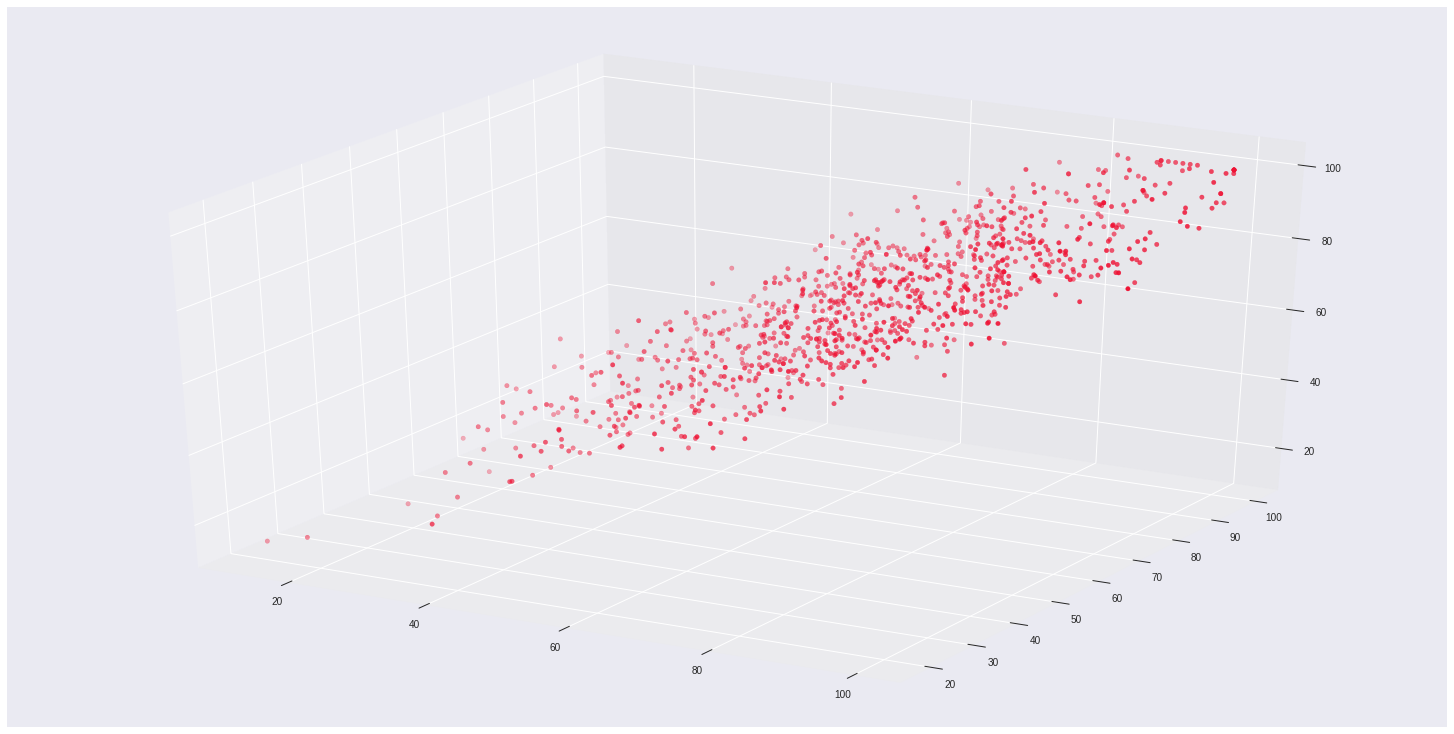

In [21]:
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data['Math'].values, data['Reading'].values, data['Writing'].values, color='#ef1234')
plt.show()

In [22]:
train_data = data.head(700)

math_train = train_data['Math'].values
read_train = train_data['Reading'].values
write_train = train_data['Writing'].values

intercepts = np.ones(len(math_train))
features = np.array([intercepts, math_train, read_train]).T
targets = np.array(write_train)
coefficients = np.array([0, 0, 0])

inital_cost = _cost(features, targets, coefficients)
print(inital_cost)

2474.7264285714286


In [24]:
new_coefficients, cost_history = train(features, targets, coefficients)

print(new_coefficients)

print(cost_history[::10000])

[-0.22839532  0.08905163  0.90257854]
[18.801042969089398, 10.477509520078272, 10.476773089239579, 10.476094379210775, 10.475468865884881, 10.474892379750502, 10.474361078098918, 10.4738714194096, 10.473420139743311, 10.473004230985532]


In [26]:
test_data = data.tail(300)

math_test = test_data['Math'].values
read_test = test_data['Reading'].values
write_test = test_data['Writing'].values

test_intercepts = np.ones(len(math_test))
test_features = np.array([test_intercepts, math_test, read_test]).T
test_targets = np.array(write_test)


rmse, R2_score = test(test_features, test_targets, new_coefficients)
print(rmse)
print(R2_score)

4.59673750305183
0.9087054724027496
